In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
weather_data = pd.read_csv("full_weather.csv")

In [4]:
# Convert to datetime first
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'], errors='coerce')

# Check for any conversion issues
print(weather_data['datetime'].isna().sum(), "rows could not be converted")

# Now you can use .dt
weather_data['hour'] = weather_data['datetime'].dt.floor('H')

# Assume weather_data['datetime'] is already datetime
weather_data['hour'] = weather_data['datetime'].dt.floor('H')

# Aggregate features per hour (mean for most, sum for precipitation)
hourly_data = weather_data.groupby('hour').agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'dew_point': 'mean',
    'pressure': 'mean',
    'wind_speed': 'mean',
    'gust': 'mean',
    'solar_radiation': 'mean',
    'precipitation_total': 'sum'
}).reset_index()

# Define target
rain_threshold = 0.5  # mm per hour
hourly_data['is_rainy'] = hourly_data['precipitation_total'] >= rain_threshold

0 rows could not be converted


C:\Users\Owner\AppData\Local\Temp\ipykernel_16064\1570394614.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data['hour'] = weather_data['datetime'].dt.floor('H')
C:\Users\Owner\AppData\Local\Temp\ipykernel_16064\1570394614.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  weather_data['hour'] = weather_data['datetime'].dt.floor('H')


In [5]:
hourly_data['hour_of_day'] = hourly_data['hour'].dt.hour
features = ['temperature','humidity','dew_point','pressure','wind_speed','gust','solar_radiation','hour_of_day']
X = hourly_data[features]
y = hourly_data['is_rainy']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8412662724554264
[[ 2195   942]
 [ 6118 35222]]
              precision    recall  f1-score   support

       False       0.26      0.70      0.38      3137
        True       0.97      0.85      0.91     41340

    accuracy                           0.84     44477
   macro avg       0.62      0.78      0.65     44477
weighted avg       0.92      0.84      0.87     44477



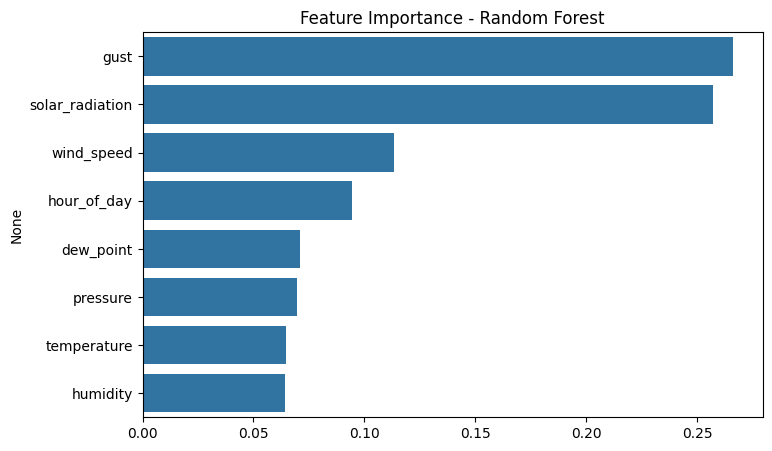

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance - Random Forest")
plt.show()

# Predict the Future